In [2]:
import argparse
import numpy as np
import pandas as pd
from tqdm import tqdm
from datetime import datetime
import matplotlib.pyplot as plt
from IdealDataInterface import IdealDataInterface

In [3]:
def get_data(path,home_id):
    # 初始化数据接口
    idi = IdealDataInterface(path)
    # 获取所有家用电器使用数据
    readings = idi.get(homeid=home_id,category='electric-appliance')
    
    return readings

In [4]:
def concat_data(readings,time_cell='300'):
    # 将数据展示在图表上
    rlist=[]
    legend=[]
    for res in readings:
        rlist.append(res['readings'].resample(time_cell+"s").mean().ffill()) #得出平均功率
        legend.append(res['subtype'])
        
    combo=pd.concat(rlist, axis=1).fillna(0)
    combo.set_axis(legend, axis='columns', inplace=True) # 修改列名
    return (combo,legend)

In [10]:

ideal_home = [169]
ideal_path = '../IDEAL/'

readings = get_data(ideal_path,268)
data,legend = concat_data(readings)
sub_df_dic = {}
for i in range(1,101):
    sub_df_dic[i] = data.iloc[round(len(data)/2*(i-1)):round(len(data)/2*(i-1))]
result = {}
for k,v in tqdm(sub_df_dic.items()):  # 对每5%df的值进行计算   k:[1,2,3,4,...,20]
    values_dic = {}
    v.reset_index(inplace=True) # v.columns:[time,d1,d2,d3...]
    for name in legend:
        time_sum = 0
        df = v[['time',name]]
        start_node = 0
        for i in range(0, len(df)):
            if start_node == 0 and df.iloc[i][name] != 0:
                start_node = df.iloc[i]['time']
            elif start_node != 0 and df.iloc[i][name] == 0:
                time_sum += (df.iloc[i-1]['time'] - start_node).seconds
                start_node = 0
            if start_node !=0 and i == (len(df)-1):
                time_sum += (df.iloc[i]['time'] - start_node).seconds
        values_dic[name] = time_sum /3600
    result[k] = values_dic

 21%|██        | 21/100 [00:00<00:00, 208.67it/s]

Found entries for 51 sensor readings.


100%|██████████| 100/100 [00:00<00:00, 190.49it/s]


['microwave', 'kettle', 'fridgefreezer', 'toaster', 'washingmachine', 'vacuumcleaner']


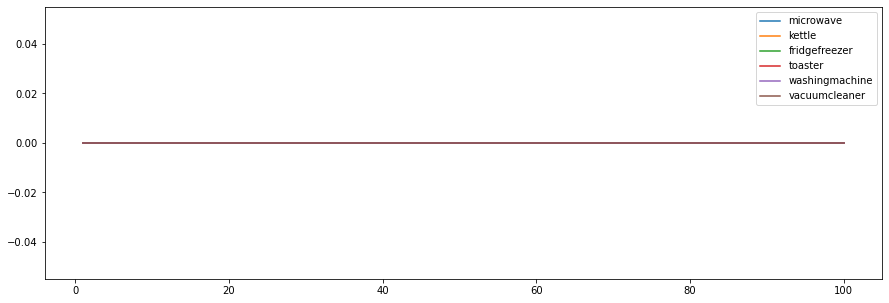

     microwave  kettle  fridgefreezer  toaster  washingmachine  vacuumcleaner
1          0.0     0.0            0.0      0.0             0.0            0.0
2          0.0     0.0            0.0      0.0             0.0            0.0
3          0.0     0.0            0.0      0.0             0.0            0.0
4          0.0     0.0            0.0      0.0             0.0            0.0
5          0.0     0.0            0.0      0.0             0.0            0.0
..         ...     ...            ...      ...             ...            ...
96         0.0     0.0            0.0      0.0             0.0            0.0
97         0.0     0.0            0.0      0.0             0.0            0.0
98         0.0     0.0            0.0      0.0             0.0            0.0
99         0.0     0.0            0.0      0.0             0.0            0.0
100        0.0     0.0            0.0      0.0             0.0            0.0

[100 rows x 6 columns]


In [11]:
tmp_list = [v for k,v in result.items()]
# tmp_dic = [{k:v} for i in tmp_list for k,v in i.items()]
keys = list(tmp_list[0].keys())
print(keys)
r_dic = {}
for key in keys:
    r_dic[key] = []
for sub_dict in tmp_list:
    for key in keys:
        r_dic[key].append(sub_dict[key])
df = pd.DataFrame(r_dic)
df.index = df.index + 1
plt.figure(figsize=(15, 5))
plt.plot(df)
plt.legend(keys)
plt.show()
print(df)

In [2]:
# 所有家庭分别显示(coding)
def concat_data(readings,time_cell='300'):
    # 将数据展示在图表上
    rlist=[]
    legend=[]
    for res in readings:
        rlist.append(res['readings'].resample(time_cell+"s").mean().ffill()) #得出平均功率
        legend.append(res['subtype'])
        
    combo=pd.concat(rlist, axis=1).fillna(0)
    combo.set_axis(legend, axis='columns', inplace=True) # 修改列名
    return (combo,legend)


smile_home = [1868,1874,2059,2583,2688,4206,5713]
smile_path = '../SMILE/'

results = {}
for home in smile_home:
    readings = get_data(smile_path,home)
    data,legend = concat_data(readings)
    sub_df_dic = {}
    for i in range(1,101):
        sub_df_dic[i] = data.iloc[round(len(data)/100*(i-1)):round(len(data)/100*i)]
    result = {}
    for k,v in tqdm(sub_df_dic.items()):  # 对每5%df的值进行计算   k:[1,2,3,4,...,20]
        values_dic = {}
        v.reset_index(inplace=True) # v.columns:[time,d1,d2,d3...]
        for name in legend:
            time_sum = 0
            df = v[['time',name]]
            start_node = 0
            for i in range(0, len(df)):
                if start_node == 0 and df.iloc[i][name] != 0:
                    start_node = df.iloc[i]['time']
                elif start_node != 0 and df.iloc[i][name] == 0:
                    time_sum += (df.iloc[i-1]['time'] - start_node).seconds
                    start_node = 0
                if start_node !=0 and i == (len(df)-1):
                    time_sum += (df.iloc[i]['time'] - start_node).seconds
            values_dic[name] = time_sum / 3600
        result[k] = values_dic
    results[home] = result
    
for home,result in results.items():
    tmp_list = [v for k,v in result.items()]
    # tmp_dic = [{k:v} for i in tmp_list for k,v in i.items()]
    keys = list(tmp_list[0].keys())
    print(keys)
    r_dic = {}
    for key in keys:
        r_dic[key] = []
    for sub_dict in tmp_list:
        for key in keys:
            r_dic[key].append(sub_dict[key])
    df = pd.DataFrame(r_dic)
    df.index = df.index + 1
    plt.figure(figsize=(15, 5))
    plt.plot(df)
    plt.legend(keys)
#     plt.title('home:',home)
    plt.show()

NameError: name 'get_data' is not defined

In [ ]:
def data_resample(readings,time_cell='300',start_date='2018-05-26 00:00:00',end_date='2018-05-27 00:00:00'):
    # 将数据展示在图表上
    rlist=[]
    legend=[]
    for res in readings:
        # 向下取样数据到指定的粒度-最好这样做
        # this before plotting forward fill is normally valid because IAMs
        # 这在绘制前填充通常是有效的，因为IAMs
        # 记录功率变化，而不是常规读数;然而
        # 有些情况下，返回零的状态是缺失的，所以要小心
        rlist.append(res['readings'].resample(time_cell+"s").mean().ffill()) #得出平均功率
        legend.append(res['subtype'])
        
    combo=pd.concat(rlist, axis=1).fillna(0)
    combo = combo[(combo.index >= start_date) & (combo.index < end_date)]
    return (combo,legend)

def show_graph(home_id,combo,legend):
    plt.figure()
    plt.plot(combo)
    plt.legend(legend)
    plt.title("Home "+str(home_id)+": device usage ")
    plt.xlabel("Date / time")
    plt.ylabel("Watts")
    plt.xticks(rotation=30, fontsize=14)
    plt.show()

Found entries for 51 sensor readings.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2018-05-26 00:00:00 to 2018-05-26 23:50:00
Freq: 600S
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sensor_4859  144 non-null    float64
 1   sensor_4860  144 non-null    float64
 2   sensor_4858  144 non-null    float64
dtypes: float64(3)
memory usage: 4.5 KB
None
       sensor_4859  sensor_4860  sensor_4858
count   144.000000   144.000000   144.000000
mean      9.000000    10.175709    46.279167
std      72.503774    23.924856   196.784265
min       2.000000     0.000000     0.000000
25%       3.000000     0.000000     0.000000
50%       3.000000     0.000000     0.000000
75%       3.000000     0.014337     0.000000
max     873.000000    92.636364  1318.500000
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


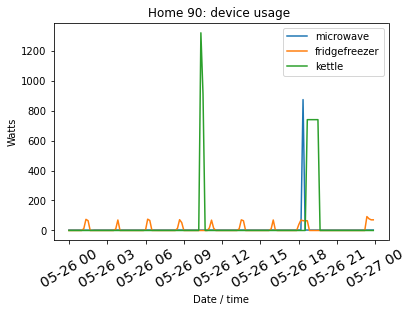

Found entries for 51 sensor readings.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2018-05-26 00:00:00 to 2018-05-26 23:50:00
Freq: 600S
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sensor_5287  144 non-null    float64
 1   sensor_5284  144 non-null    float64
 2   sensor_5285  144 non-null    float64
 3   sensor_5283  144 non-null    float64
 4   sensor_7932  144 non-null    float64
 5   sensor_5286  144 non-null    float64
dtypes: float64(6)
memory usage: 7.9 KB
None
       sensor_5287  sensor_5284  sensor_5285  sensor_5283  sensor_7932  \
count        144.0        144.0        144.0   144.000000        144.0   
mean           0.0          0.0          0.0    66.725116          0.0   
std            0.0          0.0          0.0   296.473870          0.0   
min            0.0          0.0          0.0     0.000000          0.0   
25%            0.0          0.0          0.0     0.000000  

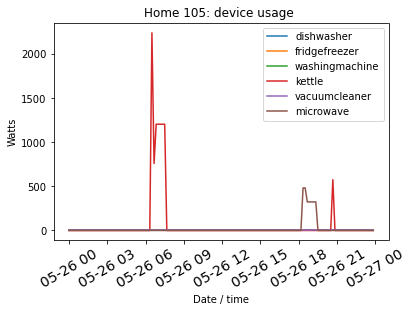

Found entries for 51 sensor readings.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2018-05-26 00:00:00 to 2018-05-26 23:50:00
Freq: 600S
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sensor_5210  144 non-null    float64
 1   sensor_5211  144 non-null    float64
 2   sensor_5213  144 non-null    float64
 3   sensor_5212  144 non-null    float64
dtypes: float64(4)
memory usage: 5.6 KB
None
       sensor_5210  sensor_5211  sensor_5213  sensor_5212
count   144.000000   144.000000   144.000000        144.0
mean     31.125000    22.372299    22.084954          0.0
std     278.103715    97.655730    36.863988          0.0
min       0.000000     0.000000     0.000000          0.0
25%       0.000000     0.000000     0.000000          0.0
50%       0.000000     0.000000     0.000000          0.0
75%       0.000000     0.000000    36.050000          0.0
max    3001.000000   509.000000    94.000000     

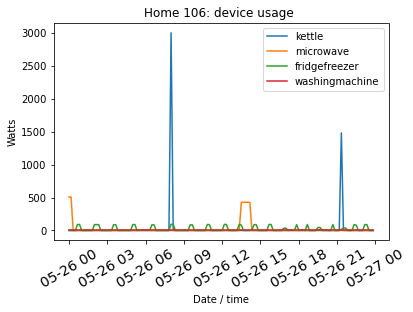

Found entries for 51 sensor readings.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2018-05-26 00:00:00 to 2018-05-26 23:50:00
Freq: 600S
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sensor_13307  144 non-null    float64
 1   sensor_10803  144 non-null    float64
 2   sensor_9252   144 non-null    float64
 3   sensor_10924  144 non-null    float64
 4   sensor_10805  144 non-null    float64
 5   sensor_9251   144 non-null    float64
 6   sensor_10802  144 non-null    float64
dtypes: float64(7)
memory usage: 9.0 KB
None
       sensor_13307  sensor_10803  sensor_9252  sensor_10924  sensor_10805  \
count         144.0         144.0   144.000000         144.0         144.0   
mean            0.0           0.0    47.396324           0.0           0.0   
std             0.0           0.0    69.217390           0.0           0.0   
min             0.0           0.0     0.000000           0.0      

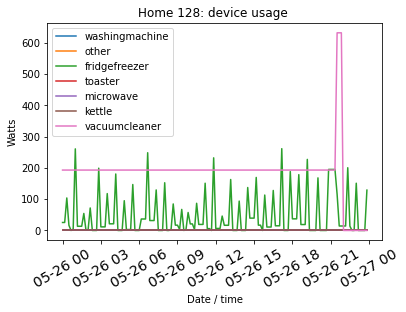

Found entries for 51 sensor readings.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2018-05-26 00:00:00 to 2018-05-26 23:50:00
Freq: 600S
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sensor_9274   144 non-null    float64
 1   sensor_9273   144 non-null    float64
 2   sensor_9272   144 non-null    float64
 3   sensor_9275   144 non-null    float64
 4   sensor_9269   144 non-null    float64
 5   sensor_9270   144 non-null    float64
 6   sensor_21312  144 non-null    float64
 7   sensor_9475   144 non-null    float64
 8   sensor_9271   144 non-null    float64
 9   sensor_21311  144 non-null    float64
 10  sensor_9471   144 non-null    float64
dtypes: float64(11)
memory usage: 13.5 KB
None
       sensor_9274  sensor_9273  sensor_9272  sensor_9275  sensor_9269  \
count        144.0   144.000000   144.000000        144.0        144.0   
mean           0.0    23.409803     4.770833          0

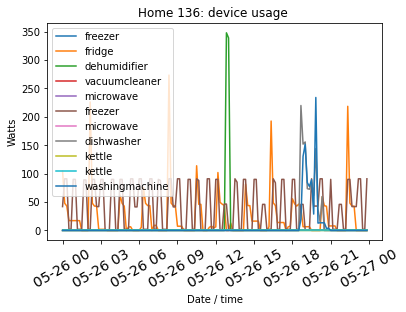

Found entries for 51 sensor readings.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2018-05-26 00:00:00 to 2018-05-26 23:50:00
Freq: 600S
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sensor_13187  144 non-null    float64
 1   sensor_13186  144 non-null    float64
 2   sensor_13370  144 non-null    float64
 3   sensor_13183  144 non-null    float64
 4   sensor_13192  144 non-null    float64
 5   sensor_13185  144 non-null    float64
 6   sensor_13184  144 non-null    float64
 7   sensor_13188  144 non-null    float64
 8   sensor_13826  144 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB
None
       sensor_13187  sensor_13186  sensor_13370  sensor_13183  sensor_13192  \
count         144.0         144.0         144.0         144.0         144.0   
mean            0.0           0.0           0.0           0.0           0.0   
std             0.0           0.0           0.0       

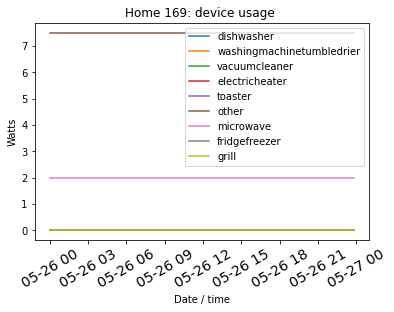

Found entries for 51 sensor readings.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2018-05-26 00:00:00 to 2018-05-26 23:50:00
Freq: 600S
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sensor_21534  144 non-null    float64
 1   sensor_21532  144 non-null    float64
 2   sensor_21533  144 non-null    float64
 3   sensor_21620  144 non-null    float64
 4   sensor_21624  144 non-null    float64
 5   sensor_21708  144 non-null    float64
dtypes: float64(6)
memory usage: 7.9 KB
None
       sensor_21534  sensor_21532  sensor_21533  sensor_21620  sensor_21624  \
count    144.000000    144.000000    144.000000    144.000000    144.000000   
mean      88.628935    124.871528     15.070266     15.056250      8.714145   
std      209.884573    459.949396     10.811665    108.857314     28.175210   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0

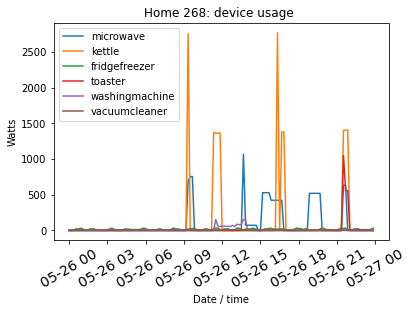

Found entries for 51 sensor readings.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2018-05-26 00:00:00 to 2018-05-26 23:50:00
Freq: 600S
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sensor_31014  144 non-null    float64
 1   sensor_31003  144 non-null    float64
 2   sensor_31005  144 non-null    float64
 3   sensor_31009  144 non-null    float64
 4   sensor_31004  144 non-null    float64
dtypes: float64(5)
memory usage: 6.8 KB
None
       sensor_31014  sensor_31003  sensor_31005  sensor_31009  sensor_31004
count    144.000000    144.000000    144.000000         144.0         144.0
mean      19.287037     81.399306     55.572476           0.0           0.0
std       98.826102    336.796579     64.397928           0.0           0.0
min        0.000000      0.000000      0.000000           0.0           0.0
25%        0.000000      0.000000      0.000000           0.0           0.0
50%     

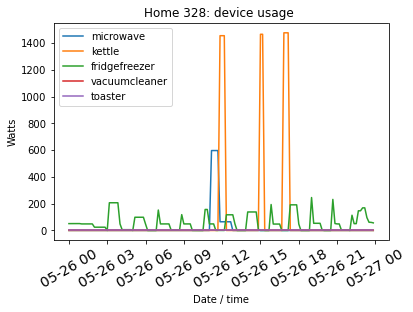

In [10]:
if __name__ == '__main__':
    smile_home = [1868,1874,2059,2583,2688,4206,5713]
    ideal_home = [90,105,106,128,136,169,268,328]
    smile_path = '../SMILE/'
    ideal_path = '../IDEAL/'
    time_cell = '600'
    start_date = '2018-05-26 00:00:00'
    end_date = '2018-05-27 00:00:00'
    # num = 200
    for home_id in ideal_home:
        readings = get_data(ideal_path,home_id)
        combo,legend = data_resample(readings,time_cell,start_date,end_date)
        print(combo.info())
        print(combo.describe())
        print(type(combo.index))
        show_graph(home_id,combo,legend)

Found entries for 27 sensor readings.


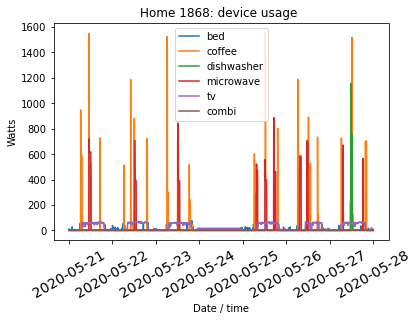

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2016 entries, 2020-05-21 00:00:00 to 2020-05-27 23:55:00
Freq: 300S
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sensor_70508  2016 non-null   float64
 1   sensor_50508  2016 non-null   float64
 2   sensor_40508  2016 non-null   float64
 3   sensor_20508  2016 non-null   float64
 4   sensor_60508  2016 non-null   float64
 5   sensor_30508  2016 non-null   float64
dtypes: float64(6)
memory usage: 110.2 KB
None


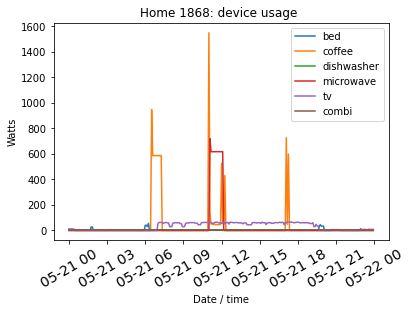

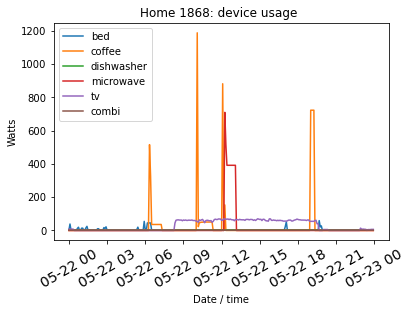

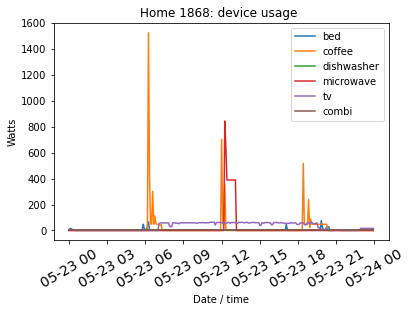

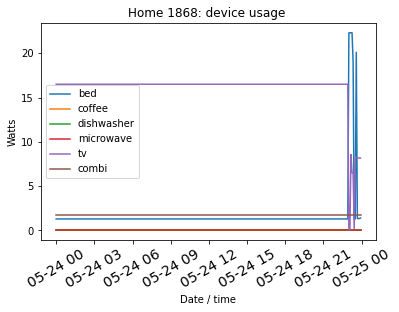

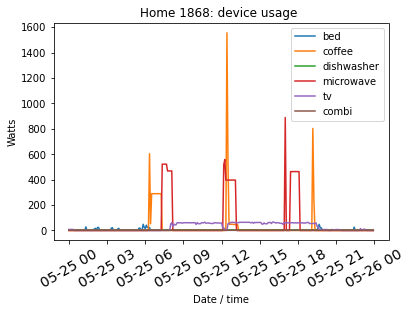

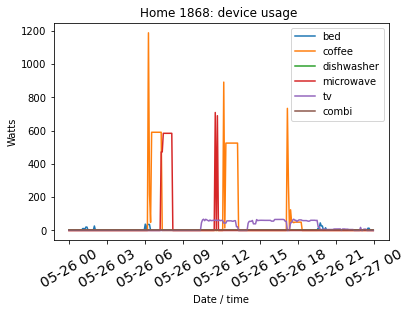

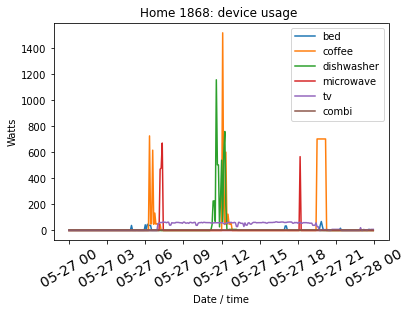

In [11]:
# 同一个家庭，连续一周的用电情况
home_id = 1868 # 1868 1874
time_cell = '300'
start_date = '2020-05-21 00:00:00'
end_date = '2020-05-28 00:00:00'
readings = get_data('../SMILE/',home_id)
combo,legend = data_resample(readings,time_cell,start_date,end_date)
show_graph(home_id,combo,legend)
print(combo.info())
for i in range(7):
    start_date = '2020-05-2%s 00:00:00' % str(i+1)
    date = '2020-05-2%s 00:00:00' % str(i+2)
    combo,legend = data_resample(readings,time_cell,start_date,date)
    show_graph(home_id,combo,legend)

In [15]:
# 传感器的处理规律
home_id = 20508
time_cell = '300'
start_date = '2020-05-21 07:30:00'
end_date = '2020-05-28 14:00:00'
readings = get_data('../SMILE/',home_id)
tmp_dic = {'time':readings[2]['readings'].index,'value':readings[2]['readings'].values}
df = pd.DataFrame(tmp_dic)
df = df[(df['time']>=start_date)&(df['time']<=end_date)]

df['时间差'] = df['time'].diff().astype('timedelta64[s]')
df.reset_index(inplace=True)
df.drop([0],inplace=True)
df.reset_index(inplace=True)

i = 0
m_value = 0
# 去除噪点
for index,data in df.iterrows():
    if i != 0:
        if data['value'] == 0 and m_value != 0:
            m_value = data['value']
            df.drop([i],inplace=True)
        elif data['value'] != 0 and m_value == 0:
            m_value = data['value']
            df.drop([i],inplace=True)
    i += 1

df = df.groupby('value')['时间差'].mean()
df = pd.DataFrame({'value':df.index,'time':df.values})

plt.scatter(df['value'],df['time'])
plt.title("sensor regular")
plt.xlabel("Value")
plt.ylabel("time_diff")
plt.show()

Found entries for 27 sensor readings.


IndexError: list index out of range

In [ ]:
# SMILE家庭的传感器的处理规律-----处理完后依旧存在一些异常值
home_id = 1868
time_cell = '300'
start_date = '2020-05-10 07:30:00'
end_date = '2020-05-30 14:00:00'
readings = get_data('../SMILE/',home_id)
for i in range(len(readings)):
    tmp_dic = {'time':readings[i]['readings'].index,'value':readings[i]['readings'].values}
    df = pd.DataFrame(tmp_dic)
    df = df[(df['time']>=start_date)&(df['time']<=end_date)]

    df['时间差'] = df['time'].diff().astype('timedelta64[s]')
    df.reset_index(inplace=True)
    df.drop([0],inplace=True)
    df.reset_index(inplace=True)
    i = 0
    m_value = 0
    for index,data in df.iterrows():
        if i != 0:
            if data['value'] == 0 and m_value != 0:
                m_value = data['value']
                df.drop([i],inplace=True)
            elif data['value'] != 0 and m_value == 0:
                m_value = data['value']
                df.drop([i],inplace=True)
        i += 1
#     print(df) # 如果想看数据，则选中这行，Ctrl+‘/’键，去掉注释
    df = df.groupby('value')['时间差'].mean()
    df = pd.DataFrame({'value':df.index,'time':df.values})
    plt.scatter(df['value'],df['time'])
plt.title("sensor regular")
plt.xlabel("Value")
plt.ylabel("time_diff")
plt.show()